## Компьютерная лингвистика: Домашнее задание 1

### Вариант B, Семенова Наталья, МКЛ-171

### Задание: использовать тексты декларации о правах человека на разных языках для сбора частотных списков триграмм/слов. 
* производим препросессинг текстов (убираем все ненужные символы/строки), токенизируем, приводим к нижнему регистру;
* собираем данные по триграммам и словам, записываем топ-300 самых частотных триграмм и топ-300 частотных слов в текстовые файлы;
* строим матрицу схожести языков на основе триграмм, схожесть считаем как объём пересечения полученных топов триграмм;
* интерпретируем результат.

Были выбраны тексты на следующих языках:
* 1.русский
* 2.английский
* 3.французский
* 4.болгарский
* 5.латинский
* 6.турецкий
* 7.индонезийский

Частотные списки слов собираем только для языков, которые мы можем лемматизировать или которые не нуждаются в лемматизации (русский, английский, французский). Для остальных - только списки частотных триграмм.

### 1. Русский язык

In [ ]:
# предобработка и выделение частотных списков триграмм/слов

In [536]:
import re
import os
import pymorphy2
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import *
from sklearn.pipeline import *
from matplotlib import pyplot as plt

In [288]:
with open("C:\\Users\\natus\\Documents\\Компьютерная лингвистика\\udhr_txt\\udhr_rus.txt", 
          encoding="utf-8") as f:
    lines_rus = f.readlines()
#сделаем общую функцию для препросессинга текстов на разных языках    
def cleantext(lines):    
    words = []
    for line in lines[6:]:
        clean_line = re.sub('[\W\d_-]+', ' ', line.lower().strip()) #удаляем пробельные символы в начале и конце строки, переводим в нижний регистр
        line_words = re.split(' +', clean_line)
        words += [w for w in line_words if w]
    return words
words_rus = cleantext(lines_rus)
words_rus

['всеобщая',
 'декларация',
 'прав',
 'человека',
 'принята',
 'и',
 'провозглашена',
 'резолюцией',
 'а',
 'iii',
 'генеральной',
 'ассамблеи',
 'от',
 'декабря',
 'года',
 'преамбула',
 'принимая',
 'во',
 'внимание',
 'что',
 'признание',
 'достоинства',
 'присущего',
 'всем',
 'членам',
 'человеческой',
 'семьи',
 'и',
 'равных',
 'и',
 'неотъемлемых',
 'прав',
 'их',
 'является',
 'основой',
 'свободы',
 'справедливости',
 'и',
 'всеобщего',
 'мира',
 'и',
 'принимая',
 'во',
 'внимание',
 'что',
 'пренебрежение',
 'и',
 'презрение',
 'к',
 'правам',
 'человека',
 'привели',
 'к',
 'варварским',
 'актам',
 'которые',
 'возмущают',
 'совесть',
 'человечества',
 'и',
 'что',
 'создание',
 'такого',
 'мира',
 'в',
 'котором',
 'люди',
 'будут',
 'иметь',
 'свободу',
 'слова',
 'и',
 'убеждений',
 'и',
 'будут',
 'свободны',
 'от',
 'страха',
 'и',
 'нужды',
 'провозглашено',
 'как',
 'высокое',
 'стремление',
 'людей',
 'и',
 'принимая',
 'во',
 'внимание',
 'что',
 'необходимо',
 'ч

In [297]:
gramms_rus = '$'.join(words_rus) 
gramms_rus

'всеобщая$декларация$прав$человека$принята$и$провозглашена$резолюцией$а$iii$генеральной$ассамблеи$от$декабря$года$преамбула$принимая$во$внимание$что$признание$достоинства$присущего$всем$членам$человеческой$семьи$и$равных$и$неотъемлемых$прав$их$является$основой$свободы$справедливости$и$всеобщего$мира$и$принимая$во$внимание$что$пренебрежение$и$презрение$к$правам$человека$привели$к$варварским$актам$которые$возмущают$совесть$человечества$и$что$создание$такого$мира$в$котором$люди$будут$иметь$свободу$слова$и$убеждений$и$будут$свободны$от$страха$и$нужды$провозглашено$как$высокое$стремление$людей$и$принимая$во$внимание$что$необходимо$чтобы$права$человека$охранялись$властью$закона$в$целях$обеспечения$того$чтобы$человек$не$был$вынужден$прибегать$в$качестве$последнего$средства$к$восстанию$против$тирании$и$угнетения$и$принимая$во$внимание$что$необходимо$содействовать$развитию$дружественных$отношений$между$народами$и$принимая$во$внимание$что$народы$объединенных$наций$подтвердили$в$уставе$свою$веру$

In [289]:
lines_rus[6]

'Всеобщая декларация прав человека\n'

In [290]:
words_rus[:5]

['всеобщая', 'декларация', 'прав', 'человека', 'принята']

In [293]:
len(set(words_rus))

713

In [292]:
#Нам нужно лемматизировать токены, чтобы составить топ300-слов, сделаем это с помощью pymorphy2
morph = pymorphy2.MorphAnalyzer()
list_words = {}

def lemmatizer(tokens):
    lemms = ""
    for t in tokens:
        if t in list_words:
            lemma = list_words[t]
        else:
            lemma = morph.parse(t)[0].normal_form
            list_words[t] = lemma
        lemms += lemma + " "
    return lemms
words_rus_lemms = lemmatizer(words_rus)
print(words_rus_lemms)

всеобщий декларация право человек принять и провозгласить резолюция а iii генеральный ассамблея от декабрь год преамбула принимать в внимание что признание достоинство присущий весь член человеческий семья и равный и неотъемлемый право они являться основа свобода справедливость и всеобщий мир и принимать в внимание что пренебрежение и презрение к право человек привести к варварский акт который возмущать совесть человечество и что создание такой мир в который человек быть иметь свобода слово и убеждение и быть свободный от страх и нужда провозгласить как высокий стремление человек и принимать в внимание что необходимый чтобы право человек охраняться власть закон в цель обеспечение тот чтобы человек не быть вынужденный прибегать в качество последний средство к восстание против тирания и угнетение и принимать в внимание что необходимый содействовать развитие дружественный отношение между народ и принимать в внимание что народ объединить нация подтвердить в устав свой вера в основной право

In [306]:
wl_rus = words_rus_lemms.split(' ')
wl_rus

['всеобщий',
 'декларация',
 'право',
 'человек',
 'принять',
 'и',
 'провозгласить',
 'резолюция',
 'а',
 'iii',
 'генеральный',
 'ассамблея',
 'от',
 'декабрь',
 'год',
 'преамбула',
 'принимать',
 'в',
 'внимание',
 'что',
 'признание',
 'достоинство',
 'присущий',
 'весь',
 'член',
 'человеческий',
 'семья',
 'и',
 'равный',
 'и',
 'неотъемлемый',
 'право',
 'они',
 'являться',
 'основа',
 'свобода',
 'справедливость',
 'и',
 'всеобщий',
 'мир',
 'и',
 'принимать',
 'в',
 'внимание',
 'что',
 'пренебрежение',
 'и',
 'презрение',
 'к',
 'право',
 'человек',
 'привести',
 'к',
 'варварский',
 'акт',
 'который',
 'возмущать',
 'совесть',
 'человечество',
 'и',
 'что',
 'создание',
 'такой',
 'мир',
 'в',
 'который',
 'человек',
 'быть',
 'иметь',
 'свобода',
 'слово',
 'и',
 'убеждение',
 'и',
 'быть',
 'свободный',
 'от',
 'страх',
 'и',
 'нужда',
 'провозгласить',
 'как',
 'высокий',
 'стремление',
 'человек',
 'и',
 'принимать',
 'в',
 'внимание',
 'что',
 'необходимый',
 'чтобы',


In [273]:
def ngrams(s): #функция для выделения триграмм 
    n = 3
    ngrams = [s[i:i+n] for i in range(len(s)-n+1)]
    return ngrams

In [301]:
ngrams_rus_done = ngrams(gramms_rus)
ngrams_rus_done

['все',
 'сео',
 'еоб',
 'общ',
 'бща',
 'щая',
 'ая$',
 'я$д',
 '$де',
 'дек',
 'екл',
 'кла',
 'лар',
 'ара',
 'рац',
 'аци',
 'ция',
 'ия$',
 'я$п',
 '$пр',
 'пра',
 'рав',
 'ав$',
 'в$ч',
 '$че',
 'чел',
 'ело',
 'лов',
 'ове',
 'век',
 'ека',
 'ка$',
 'а$п',
 '$пр',
 'при',
 'рин',
 'иня',
 'нят',
 'ята',
 'та$',
 'а$и',
 '$и$',
 'и$п',
 '$пр',
 'про',
 'ров',
 'ово',
 'воз',
 'озг',
 'згл',
 'гла',
 'лаш',
 'аше',
 'шен',
 'ена',
 'на$',
 'а$р',
 '$ре',
 'рез',
 'езо',
 'зол',
 'олю',
 'люц',
 'юци',
 'цие',
 'ией',
 'ей$',
 'й$а',
 '$а$',
 'а$i',
 '$ii',
 'iii',
 'ii$',
 'i$г',
 '$ге',
 'ген',
 'ене',
 'нер',
 'ера',
 'рал',
 'аль',
 'льн',
 'ьно',
 'ной',
 'ой$',
 'й$а',
 '$ас',
 'асс',
 'сса',
 'сам',
 'амб',
 'мбл',
 'бле',
 'леи',
 'еи$',
 'и$о',
 '$от',
 'от$',
 'т$д',
 '$де',
 'дек',
 'ека',
 'каб',
 'абр',
 'бря',
 'ря$',
 'я$г',
 '$го',
 'год',
 'ода',
 'да$',
 'а$п',
 '$пр',
 'пре',
 'реа',
 'еам',
 'амб',
 'мбу',
 'бул',
 'ула',
 'ла$',
 'а$п',
 '$пр',
 'при',
 'рин',


In [302]:
from collections import Counter
from pprint import pprint

In [299]:
def frequency_trigrams(s): #функция для подсчета самых частотных триграмм
    freq_trigrams = Counter(s)
    trigrams = freq_trigrams.most_common(299)
    return trigrams

In [304]:
trigrams_rus_done = frequency_trigrams(ngrams_rus_done)
trigrams_rus_done

[('$пр', 135),
 ('$и$', 116),
 ('рав', 89),
 ('ств', 83),
 ('$на', 82),
 ('пра', 77),
 ('го$', 73),
 ('ени', 72),
 ('ать', 67),
 ('ове', 62),
 ('во$', 60),
 ('ани', 55),
 ('$ка', 55),
 ('ть$', 53),
 ('ия$', 51),
 ('$в$', 51),
 ('$по', 51),
 ('лов', 50),
 ('$об', 50),
 ('$св', 49),
 ('сво', 49),
 ('$че', 47),
 ('на$', 47),
 ('ело', 46),
 ('чел', 45),
 ('ост', 45),
 ('$со', 45),
 ('$ст', 45),
 ('ие$', 44),
 ('о$н', 44),
 ('ого', 43),
 ('ния', 43),
 ('ет$', 43),
 ('ста', 42),
 ('ест', 41),
 ('век', 40),
 ('ажд', 40),
 ('ый$', 40),
 ('аво', 40),
 ('ние', 39),
 ('$им', 39),
 ('льн', 38),
 ('$не', 38),
 ('ли$', 37),
 ('име', 37),
 ('ова', 37),
 ('при', 36),
 ('т$п', 36),
 ('и$п', 35),
 ('каж', 35),
 ('$ра', 34),
 ('обо', 34),
 ('или', 34),
 ('$до', 33),
 ('ых$', 33),
 ('жды', 33),
 ('тат', 33),
 ('воб', 32),
 ('бод', 32),
 ('ек$', 32),
 ('и$с', 32),
 ('дый', 32),
 ('ья$', 32),
 ('аци', 31),
 ('ва$', 31),
 ('его', 31),
 ('ся$', 31),
 ('й$ч', 31),
 ('и$и', 30),
 ('но$', 30),
 ('мее', 30),
 ('е

In [161]:
trigrams_rus_written = str(trigrams_rus_done)


In [278]:
with open('trigrams_rus.txt', 'w') as fl: #записываем триграммы в файл
    fl.write(trigrams_rus_written)

In [307]:
freq_w = Counter(wl_rus) #самые частотные слова
pairs = freq_w.most_common(299)
pprint(pairs)

[('и', 116),
 ('право', 64),
 ('в', 62),
 ('человек', 45),
 ('на', 40),
 ('иметь', 36),
 ('каждый', 35),
 ('статья', 30),
 ('или', 28),
 ('он', 26),
 ('быть', 25),
 ('свобода', 22),
 ('должный', 21),
 ('не', 17),
 ('свой', 17),
 ('весь', 13),
 ('к', 12),
 ('который', 12),
 ('для', 11),
 ('мочь', 11),
 ('от', 10),
 ('образование', 10),
 ('что', 9),
 ('равный', 9),
 ('какой', 9),
 ('защита', 9),
 ('декларация', 8),
 ('принимать', 8),
 ('они', 8),
 ('как', 8),
 ('социальный', 8),
 ('с', 8),
 ('никто', 8),
 ('всеобщий', 7),
 ('внимание', 7),
 ('свободный', 7),
 ('закон', 7),
 ('народ', 7),
 ('при', 7),
 ('государство', 7),
 ('настоящий', 7),
 ('общество', 7),
 ('то', 7),
 ('брак', 7),
 ('такой', 6),
 ('убеждение', 6),
 ('обеспечение', 6),
 ('содействовать', 6),
 ('страна', 6),
 ('либо', 6),
 ('по', 6),
 ('другой', 6),
 ('достоинство', 5),
 ('являться', 5),
 ('основа', 5),
 ('необходимый', 5),
 ('тот', 5),
 ('объединить', 5),
 ('нация', 5),
 ('организация', 5),
 ('этот', 5),
 ('полный', 5),

In [165]:
common_words_rus = str(pairs)

In [166]:
with open('common_words_rus.txt', 'w') as fl: #записываем самые частотные слова в файл
    fl.write(common_words_rus)

### 2. Английский язык

In [ ]:
# предобработка и выделение частотных списков триграмм/слов
# лемматизация не нужна для этого языка

In [308]:
with open("C:\\Users\\natus\\Documents\\Компьютерная лингвистика\\udhr_txt\\udhr_eng.txt", 
          encoding="utf-8") as f1:
    lines_eng = f1.readlines()

In [309]:
words_eng = cleantext(lines_eng)
words_eng

['universal',
 'declaration',
 'of',
 'human',
 'rights',
 'preamble',
 'whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of',
 'all',
 'members',
 'of',
 'the',
 'human',
 'family',
 'is',
 'the',
 'foundation',
 'of',
 'freedom',
 'justice',
 'and',
 'peace',
 'in',
 'the',
 'world',
 'whereas',
 'disregard',
 'and',
 'contempt',
 'for',
 'human',
 'rights',
 'have',
 'resulted',
 'in',
 'barbarous',
 'acts',
 'which',
 'have',
 'outraged',
 'the',
 'conscience',
 'of',
 'mankind',
 'and',
 'the',
 'advent',
 'of',
 'a',
 'world',
 'in',
 'which',
 'human',
 'beings',
 'shall',
 'enjoy',
 'freedom',
 'of',
 'speech',
 'and',
 'belief',
 'and',
 'freedom',
 'from',
 'fear',
 'and',
 'want',
 'has',
 'been',
 'proclaimed',
 'as',
 'the',
 'highest',
 'aspiration',
 'of',
 'the',
 'common',
 'people',
 'whereas',
 'it',
 'is',
 'essential',
 'if',
 'man',
 'is',
 'not',
 'to',
 'be',
 'compelled',
 't

In [310]:
gramms_eng = '$'.join(words_eng)
gramms_eng

'universal$declaration$of$human$rights$preamble$whereas$recognition$of$the$inherent$dignity$and$of$the$equal$and$inalienable$rights$of$all$members$of$the$human$family$is$the$foundation$of$freedom$justice$and$peace$in$the$world$whereas$disregard$and$contempt$for$human$rights$have$resulted$in$barbarous$acts$which$have$outraged$the$conscience$of$mankind$and$the$advent$of$a$world$in$which$human$beings$shall$enjoy$freedom$of$speech$and$belief$and$freedom$from$fear$and$want$has$been$proclaimed$as$the$highest$aspiration$of$the$common$people$whereas$it$is$essential$if$man$is$not$to$be$compelled$to$have$recourse$as$a$last$resort$to$rebellion$against$tyranny$and$oppression$that$human$rights$should$be$protected$by$the$rule$of$law$whereas$it$is$essential$to$promote$the$development$of$friendly$relations$between$nations$whereas$the$peoples$of$the$united$nations$have$in$the$charter$reaffirmed$their$faith$in$fundamental$human$rights$in$the$dignity$and$worth$of$the$human$person$and$in$the$equal$rights$

In [311]:
len(set(words_eng))

504

In [314]:
ngrams_eng_done = ngrams(gramms_eng)
ngrams_eng_done

['uni',
 'niv',
 'ive',
 'ver',
 'ers',
 'rsa',
 'sal',
 'al$',
 'l$d',
 '$de',
 'dec',
 'ecl',
 'cla',
 'lar',
 'ara',
 'rat',
 'ati',
 'tio',
 'ion',
 'on$',
 'n$o',
 '$of',
 'of$',
 'f$h',
 '$hu',
 'hum',
 'uma',
 'man',
 'an$',
 'n$r',
 '$ri',
 'rig',
 'igh',
 'ght',
 'hts',
 'ts$',
 's$p',
 '$pr',
 'pre',
 'rea',
 'eam',
 'amb',
 'mbl',
 'ble',
 'le$',
 'e$w',
 '$wh',
 'whe',
 'her',
 'ere',
 'rea',
 'eas',
 'as$',
 's$r',
 '$re',
 'rec',
 'eco',
 'cog',
 'ogn',
 'gni',
 'nit',
 'iti',
 'tio',
 'ion',
 'on$',
 'n$o',
 '$of',
 'of$',
 'f$t',
 '$th',
 'the',
 'he$',
 'e$i',
 '$in',
 'inh',
 'nhe',
 'her',
 'ere',
 'ren',
 'ent',
 'nt$',
 't$d',
 '$di',
 'dig',
 'ign',
 'gni',
 'nit',
 'ity',
 'ty$',
 'y$a',
 '$an',
 'and',
 'nd$',
 'd$o',
 '$of',
 'of$',
 'f$t',
 '$th',
 'the',
 'he$',
 'e$e',
 '$eq',
 'equ',
 'qua',
 'ual',
 'al$',
 'l$a',
 '$an',
 'and',
 'nd$',
 'd$i',
 '$in',
 'ina',
 'nal',
 'ali',
 'lie',
 'ien',
 'ena',
 'nab',
 'abl',
 'ble',
 'le$',
 'e$r',
 '$ri',
 'rig',


In [315]:
trigrams_eng_done = frequency_trigrams(ngrams_eng_done)
trigrams_eng_done

[('$th', 154),
 ('the', 152),
 ('$an', 129),
 ('he$', 123),
 ('nd$', 113),
 ('and', 111),
 ('ion', 103),
 ('$of', 95),
 ('of$', 91),
 ('tio', 89),
 ('on$', 86),
 ('$to', 86),
 ('to$', 84),
 ('$in', 72),
 ('al$', 67),
 ('ati', 65),
 ('igh', 57),
 ('rig', 56),
 ('ght', 56),
 ('$ri', 55),
 ('or$', 52),
 ('ent', 51),
 ('as$', 50),
 ('ll$', 49),
 ('is$', 48),
 ('ed$', 48),
 ('in$', 46),
 ('$be', 46),
 ('$ar', 46),
 ('e$r', 45),
 ('ver', 44),
 ('le$', 44),
 ('s$a', 44),
 ('ne$', 44),
 ('one', 43),
 ('e$e', 41),
 ('all', 41),
 ('s$t', 41),
 ('eve', 40),
 ('t$t', 39),
 ('$fr', 38),
 ('tic', 38),
 ('e$a', 38),
 ('$re', 37),
 ('$ha', 37),
 ('art', 37),
 ('$pr', 36),
 ('ty$', 36),
 ('d$t', 35),
 ('ery', 35),
 ('$or', 35),
 ('y$a', 34),
 ('e$h', 34),
 ('$co', 34),
 ('$ev', 34),
 ('ht$', 34),
 ('ts$', 33),
 ('ng$', 33),
 ('rti', 33),
 ('n$a', 32),
 ('his', 32),
 ('ing', 31),
 ('be$', 31),
 ('yon', 31),
 ('fre', 30),
 ('ree', 30),
 ('ce$', 30),
 ('n$t', 30),
 ('$sh', 30),
 ('icl', 30),
 ('cle', 30),

In [316]:
trigrams_eng_written = str(trigrams_eng_done)
with open('trigrams_eng.txt', 'w') as f2:
    f2.write(trigrams_eng_written)

In [322]:
freq_w1 = Counter(words_eng)
pairs1 = freq_w1.most_common(299)
pprint(pairs1)

[('the', 121),
 ('and', 106),
 ('of', 91),
 ('to', 83),
 ('in', 43),
 ('right', 33),
 ('be', 31),
 ('article', 30),
 ('everyone', 30),
 ('or', 30),
 ('has', 28),
 ('shall', 27),
 ('rights', 22),
 ('his', 21),
 ('a', 19),
 ('any', 18),
 ('for', 17),
 ('human', 13),
 ('is', 13),
 ('by', 13),
 ('all', 12),
 ('equal', 11),
 ('freedom', 11),
 ('as', 11),
 ('this', 11),
 ('freedoms', 10),
 ('one', 10),
 ('no', 10),
 ('which', 9),
 ('law', 9),
 ('with', 9),
 ('entitled', 9),
 ('protection', 9),
 ('have', 8),
 ('nations', 8),
 ('social', 8),
 ('education', 8),
 ('are', 8),
 ('declaration', 7),
 ('whereas', 7),
 ('free', 7),
 ('family', 6),
 ('against', 6),
 ('fundamental', 6),
 ('full', 6),
 ('other', 6),
 ('at', 6),
 ('universal', 5),
 ('dignity', 5),
 ('from', 5),
 ('it', 5),
 ('united', 5),
 ('their', 5),
 ('person', 5),
 ('society', 5),
 ('national', 5),
 ('international', 5),
 ('without', 5),
 ('religion', 5),
 ('country', 5),
 ('public', 5),
 ('recognition', 4),
 ('enjoy', 4),
 ('that', 

In [323]:
common_words_eng = str(pairs1)
with open('common_words_eng.txt', 'w') as f2:
    f2.write(common_words_eng)

### Для остальных языков уберем ненужные выводы, чтобы было меньше лишнего

### 3. Французский язык

In [ ]:
# предобработка и выделение частотных списков триграмм/слов
# лемматизация не нужна для этого языка

In [372]:
with open("C:\\Users\\natus\\Documents\\Компьютерная лингвистика\\udhr_txt\\udhr_fra.txt", 
          encoding="cp1251") as f3:
    lines_fr = f3.readlines()

In [373]:
words_fr = cleantext(lines_fr)
gramms_fr = '$'.join(words_fr)
len(set(words_fr))

617

In [374]:
ngrams_fr_done = ngrams(gramms_fr)
trigrams_fr_done = frequency_trigrams(ngrams_fr_done)

In [375]:
trigrams_fr_written = str(trigrams_fr_done)
trigrams_fr_written

"[('$de', 182), ('es$', 169), ('de$', 139), ('ion', 109), ('$г$', 108), ('le$', 107), ('nt$', 102), ('et$', 94), ('tio', 93), ('вђ$', 92), ('$et', 90), ('ent', 83), ('$la', 81), ('e$d', 79), ('la$', 79), ('on$', 78), ('tг$', 78), ('oit', 77), ('e$l', 77), ('ne$', 76), ('$le', 74), ('s$d', 71), ('e$p', 67), ('ati', 66), ('t$d', 65), ('roi', 64), ('$dr', 63), ('dro', 63), ('$co', 63), ('it$', 62), ('ns$', 57), ('te$', 56), ('e$s', 54), ('men', 53), ('t$г', 53), ('re$', 52), ('$qu', 51), ('$to', 51), ('$lв', 50), ('lвђ', 50), ('$un', 49), ('con', 49), ('tou', 49), ('que', 48), ('les', 47), ('$so', 46), ('$pe', 46), ('e$a', 45), ('des', 44), ('$au', 44), ('$pr', 43), ('son', 43), ('e$c', 42), ('ons', 42), ('s$l', 41), ('$pa', 41), ('dг$', 40), ('ts$', 40), ('ue$', 40), ('$li', 40), ('г$l', 40), ('г$s', 40), ('s$e', 40), ('$en', 39), ('art', 39), ('onn', 38), ('t$l', 38), ('e$t', 38), ('e$e', 37), ('eme', 37), ('г$d', 37), ('$ar', 37), ('ant', 36), ('ont', 36), ('rti', 36), ('ers', 35), ('u

In [376]:
with open('trigrams_fr.txt', 'w') as f6:
    f6.write(trigrams_fr_written)

In [377]:
freq_w2 = Counter(words_fr)
pairs2 = freq_w2.most_common(299)
pprint(pairs2)

[('de', 134),
 ('г', 108),
 ('et', 90),
 ('la', 79),
 ('lвђ', 50),
 ('des', 42),
 ('droit', 41),
 ('le', 36),
 ('a', 32),
 ('les', 31),
 ('article', 30),
 ('ou', 26),
 ('toute', 26),
 ('dвђ', 25),
 ('dг', 23),
 ('s', 23),
 ('en', 23),
 ('personne', 23),
 ('droits', 22),
 ('sa', 22),
 ('que', 20),
 ('libertг', 19),
 ('dans', 19),
 ('un', 19),
 ('une', 18),
 ('ne', 17),
 ('tг', 15),
 ('par', 15),
 ('tous', 14),
 ('au', 14),
 ('rг', 12),
 ('est', 12),
 ('qui', 11),
 ('pour', 11),
 ('e', 11),
 ('гєtre', 11),
 ('homme', 10),
 ('ont', 10),
 ('quвђ', 10),
 ('du', 10),
 ('aux', 10),
 ('ce', 9),
 ('prг', 8),
 ('considг', 8),
 ('soit', 8),
 ('nations', 8),
 ('peut', 8),
 ('pays', 8),
 ('nul', 8),
 ('protection', 8),
 ('claration', 7),
 ('rant', 7),
 ('contre', 7),
 ('sont', 7),
 ('nг', 7),
 ('son', 7),
 ('famille', 6),
 ('il', 6),
 ('aucune', 6),
 ('sera', 6),
 ('ses', 6),
 ('doit', 6),
 ('dignitг', 5),
 ('plus', 5),
 ('unies', 5),
 ('se', 5),
 ('vie', 5),
 ('sente', 5),
 ('toutes', 5),
 ('sociг

In [351]:
common_words_fr = str(pairs2)
with open('common_words_fr.txt', 'w') as f2:
    f2.write(common_words_fr)

### 4. Болгарский язык

In [ ]:
# предобработка и выделение частотных списков триграмм

In [389]:
with open("C:\\Users\\natus\\Documents\\Компьютерная лингвистика\\udhr_txt\\udhr_bul.txt", 
          encoding="utf-8") as f5:
    lines_bul = f5.readlines()

In [390]:
words_bul = cleantext(lines_bul)
gramms_bul = '$'.join(words_bul)
len(set(words_bul))

618

In [391]:
ngrams_bul_done = ngrams(gramms_bul)
trigrams_bul_done = frequency_trigrams(ngrams_bul_done)

In [394]:
trigrams_bul_written = str(trigrams_bul_done)
trigrams_bul_written

"[('$на', 181), ('на$', 160), ('$пр', 138), ('то$', 119), ('$и$', 111), ('рав', 88), ('да$', 84), ('пра', 77), ('$да', 76), ('а$с', 75), ('ств', 74), ('ва$', 74), ('та$', 71), ('а$п', 70), ('ите', 65), ('но$', 58), ('а$н', 57), ('ени', 57), ('во$', 57), ('$за', 55), ('е$н', 55), ('о$и', 53), ('ван', 52), ('ото', 52), ('те$', 52), ('$вс', 51), ('не$', 51), ('ове', 50), ('ки$', 50), ('$не', 50), ('ен$', 50), ('о$н', 48), ('ава', 47), ('а$и', 47), ('$по', 47), ('ия$', 46), ('чов', 46), ('и$ч', 46), ('$чо', 45), ('ане', 45), ('лен', 45), ('ни$', 45), ('ие$', 43), ('аво', 43), ('а$д', 41), ('$св', 41), ('век', 40), ('е$п', 40), ('$об', 40), ('сво', 39), ('ест', 39), ('$им', 38), ('има', 38), ('все', 37), ('ост', 37), ('и$д', 37), ('ани', 37), ('тво', 36), ('и$с', 36), ('ние', 36), ('или', 36), ('ли$', 36), ('ват', 35), ('вот', 35), ('$чл', 35), ('чле', 35), ('$ра', 34), ('ма$', 34), ('и$п', 33), ('а$о', 32), ('$в$', 32), ('ек$', 32), ('сек', 32), ('еки', 32), ('е$и', 31), ('$ил', 31), ('ата

In [395]:
with open('trigrams_bul.txt', 'w') as f6:
    f6.write(trigrams_bul_written)

### 5. Латинский язык

In [ ]:
# предобработка и выделение частотных списков триграмм

In [396]:
with open("C:\\Users\\natus\\Documents\\Компьютерная лингвистика\\udhr_txt\\udhr_lat.txt", 
          encoding="utf-8") as f7:
    lines_lat = f7.readlines()

In [397]:
words_lat = cleantext(lines_lat)
gramms_lat = '$'.join(words_lat)
len(set(words_lat))

703

In [398]:
ngrams_lat_done = ngrams(gramms_lat)
trigrams_lat_done = frequency_trigrams(ngrams_lat_done)

In [399]:
trigrams_lat_written = str(trigrams_lat_done)
trigrams_lat_written

"[('is$', 134), ('et$', 119), ('um$', 101), ('us$', 100), ('$et', 89), ('ae$', 82), ('tat', 77), ('ati', 70), ('$co', 68), ('que', 65), ('ion', 63), ('ue$', 62), ('$qu', 55), ('em$', 53), ('ent', 51), ('$iu', 49), ('oni', 49), ('est', 49), ('$su', 48), ('$po', 47), ('$in', 47), ('tio', 44), ('ium', 42), ('tis', 42), ('e$i', 42), ('tes', 42), ('ate', 41), ('bus', 41), ('ita', 40), ('ius', 40), ('ibu', 40), ('nti', 39), ('eri', 39), ('es$', 39), ('qui', 39), ('s$p', 37), ('per', 37), ('con', 37), ('s$e', 37), ('end', 37), ('nis', 36), ('pot', 36), ('ote', 36), ('$ha', 35), ('s$i', 34), ('$pr', 34), ('am$', 33), ('abe', 33), ('$ho', 32), ('uis', 32), ('m$h', 31), ('uae', 31), ('tem', 31), ('ndi', 31), ('hab', 31), ('bet', 31), ('$de', 30), ('sta', 30), ('min', 29), ('iur', 29), ('isq', 29), ('squ', 29), ('sua', 29), ('one', 28), ('hom', 28), ('ter', 28), ('ici', 28), ('$re', 27), ('rat', 26), ('m$e', 26), ('$om', 26), ('omn', 26), ('$di', 26), ('rum', 26), ('s$a', 25), ('lib', 25), ('ibe'

In [400]:
with open('trigrams_lat.txt', 'w') as f8:
    f8.write(trigrams_lat_written)

### 6. Турецкий язык

In [ ]:
# предобработка и выделение частотных списков триграмм

In [406]:
with open("C:\\Users\\natus\\Documents\\Компьютерная лингвистика\\udhr_txt\\udhr_tur.txt", 
          encoding="cp1251") as f8:
    lines_tur = f8.readlines()

In [407]:
words_tur = cleantext(lines_tur)
gramms_tur = '$'.join(words_tur)
len(set(words_tur))

732

In [408]:
ngrams_tur_done = ngrams(gramms_tur)
trigrams_tur_done = frequency_trigrams(ngrams_tur_done)

In [409]:
trigrams_tur_written = str(trigrams_tur_done)
trigrams_tur_written

"[('д$n', 140), ('$ve', 123), ('$ha', 92), ('ve$', 87), ('ler', 73), ('lar', 72), ('ir$', 68), ('sд$', 65), ('in$', 63), ('hak', 62), ('de$', 62), ('rд$', 56), ('kд$', 53), ('nд$', 52), ('$he', 52), ('e$h', 51), ('her', 51), ('bir', 50), ('$bi', 49), ('д$r', 49), ('an$', 47), ('arд', 47), ('$ma', 47), ('$еџ', 46), ('er$', 46), ('eri', 45), ('iеџ', 45), ('ya$', 44), ('ak$', 43), ('eti', 41), ('$n$', 41), ('iye', 40), ('yet', 39), ('$ka', 39), ('asд', 39), ('eya', 37), ('$nд', 37), ('$ol', 37), ('tle', 37), ('гјr', 36), ('ara', 36), ('akk', 36), ('kkд', 36), ('etl', 35), ('esi', 34), ('$ta', 33), ('na$', 33), ('mad', 33), ('dд$', 33), ('dde', 32), ('ek$', 31), ('add', 31), ('iг$', 30), ('ini', 29), ('$bu', 29), ('nda', 29), ('kla', 28), ('$г$', 28), ('ile', 28), ('eеџ', 28), ('rin', 27), ('ne$', 27), ('vey', 27), ('n$h', 26), ('ine', 26), ('e$k', 26), ('$r$', 26), ('sin', 25), ('џд$', 25), ('$na', 25), ('ama', 25), ('ere', 25), ('$sa', 25), ('r$h', 25), ('mas', 24), ('д$v', 24), ('le$', 

In [410]:
with open('trigrams_tur.txt', 'w') as f8:
    f8.write(trigrams_tur_written)

### 7. Индонезийский язык

In [ ]:
# предобработка и выделение частотных списков триграмм

In [446]:
with open("C:\\Users\\natus\\Documents\\Компьютерная лингвистика\\udhr_txt\\udhr_ind.txt", 
          encoding="utf-8") as f8:
    lines_ind = f8.readlines()

In [447]:
words_ind = cleantext(lines_ind)
gramms_ind = '$'.join(words_ind)
len(set(words_ind))

528

In [448]:
ngrams_ind_done = ngrams(gramms_ind)
trigrams_ind_done = frequency_trigrams(ngrams_ind_done)

list

In [449]:
trigrams_ind_written = str(trigrams_ind_done)
trigrams_ind_written

"[('an$', 438), ('ang', 205), ('$da', 163), ('ng$', 152), ('ak$', 125), ('$pe', 125), ('$ke', 119), ('ata', 115), ('$me', 115), ('$se', 114), ('dan', 107), ('asa', 100), ('kan', 88), ('hak', 87), ('$di', 87), ('$be', 86), ('ber', 81), ('per', 80), ('ran', 75), ('nga', 74), ('yan', 73), ('$ha', 72), ('eng', 72), ('$ya', 72), ('men', 66), ('gan', 66), ('nya', 65), ('ara', 65), ('n$p', 61), ('n$d', 56), ('tan', 55), ('n$k', 55), ('al$', 55), ('$at', 54), ('a$d', 54), ('at$', 52), ('ora', 51), ('ala', 50), ('$ba', 49), ('san', 49), ('ap$', 48), ('erh', 48), ('$ma', 47), ('n$b', 47), ('ya$', 47), ('rha', 47), ('g$b', 45), ('pen', 45), ('eba', 44), ('aan', 43), ('as$', 43), ('ntu', 41), ('$or', 41), ('uk$', 41), ('a$p', 40), ('tas', 39), ('aka', 39), ('tia', 39), ('eti', 39), ('$te', 38), ('ban', 38), ('$un', 38), ('set', 38), ('$pa', 38), ('ter', 37), ('n$y', 37), ('sal', 37), ('k$a', 36), ('lam', 36), ('tuk', 36), ('beb', 36), ('bas', 36), ('k$m', 36), ('iap', 36), ('n$m', 35), ('keb', 35)

In [450]:
with open('trigrams_ind.txt', 'w') as f9:
    f9.write(trigrams_ind_written)

### Матрица схожести языков

строим матрицу схожести языков на основе триграмм, схожесть считаем как объём пересечения полученных топов триграмм

In [542]:
vectorizer = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb', max_features = 300)
rus_vect = vectorizer.fit_transform(words_rus)
fn_rus = vectorizer.get_feature_names()
print(rus_vect.shape)

(1578, 300)


In [543]:
vectorizer = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb', max_features = 300)
eng_vect = vectorizer.fit_transform(words_eng)
fn_eng = vectorizer.get_feature_names()

In [544]:
vectorizer = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb', max_features = 300)
fr_vect = vectorizer.fit_transform(words_fr)
fn_fr = vectorizer.get_feature_names()

In [545]:
vectorizer = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb', max_features = 300)
bul_vect = vectorizer.fit_transform(words_bul)
fn_bul = vectorizer.get_feature_names()

In [546]:
vectorizer = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb', max_features = 300)
lat_vect = vectorizer.fit_transform(words_lat)
fn_lat = vectorizer.get_feature_names()

In [547]:
vectorizer = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb', max_features = 300)
tur_vect = vectorizer.fit_transform(words_tur)
fn_tur = vectorizer.get_feature_names()

In [548]:
vectorizer = CountVectorizer(ngram_range = [3,3], analyzer = 'char_wb', max_features = 300)
ind_vect = vectorizer.fit_transform(words_ind)
fn_ind = vectorizer.get_feature_names()

In [549]:
all_grams= []
all_grams.append(fn_rus)
all_grams.append(fn_eng)
all_grams.append(fn_fr)
all_grams.append(fn_bul)
all_grams.append(fn_lat)
all_grams.append(fn_tur)
all_grams.append(fn_ind)

In [550]:
m = np.zeros((7, 7)) 
for i, g in enumerate(all_grams):
    for j, h in enumerate(all_grams):
        if j>=i:
            z = 0
            for t in g:
                if t in h:
                    z += 1
            m[i][j] = z
            m[j][i] = z

In [552]:
np.set_printoptions(precision=3)#функция вызывает весь массив, после точки выводит 3 знака
massive = m/300
print(massive)

[[ 1.     0.     0.     0.503  0.     0.     0.   ]
 [ 0.     1.     0.427  0.     0.317  0.153  0.173]
 [ 0.     0.427  1.     0.     0.373  0.167  0.177]
 [ 0.503  0.     0.     1.     0.     0.     0.   ]
 [ 0.     0.317  0.373  0.     1.     0.143  0.213]
 [ 0.     0.153  0.167  0.     0.143  1.     0.223]
 [ 0.     0.173  0.177  0.     0.213  0.223  1.   ]]


In [ ]:
# сверху вниз и слева направо языки: русский,английский,французский,болгарский,латинский,турецкий,индонезийский

Можно отметить, что наибольший процент схожести показали русский и болгарский (50,3%), французский и английский (42,7%), латинский и французский (37,3%), английский и латинский (31,7%). Эти данные коррелируют с реальными данными о языках.

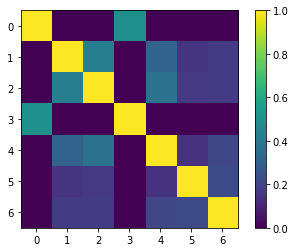

In [553]:
#визуализация матрицы схожести языков
plt.interactive(False)
plt.imshow(massive)
plt.colorbar()
plt.show()